In [2]:
%load_ext autoreload
%autoreload 2
import sys

from matplotlib import rc

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_svmlight_file
import numpy as np
import pickle
import glob
import os

from matplotlib.ticker import MaxNLocator

from utils import unpickle_dir

from constants import LOSS_PER_EPOCH

LOG_SCALE = True

In [3]:
optimums = unpickle_dir('dump/optimum-epsilon/')
exact_optimum = optimums['baselines']['epsilon']

In [4]:
n, d = 400000, 2000
shift = 0

In [5]:
def plot_final(method, quantization, split_way, num_nodes,topology, label, display_name):
#     print('dump/epsilon-final-' + method + "-" + quantization + ("" if len(quantization) == 0 else "-")
#                 + split_way + "-" + str(num_nodes)+"-"+topology)
    data = unpickle_dir('dump/epsilon-final-' + method + "-" + quantization + ("" if len(quantization) == 0 else "-")
                + split_way + "-" + str(num_nodes)+"-"+topology)
#     print(data)
    
    x = (np.arange(0, len(data['results'][1]))-shift)/LOSS_PER_EPOCH
#     print(x)
#     print(data['results'][1]-exact_optimum)
    scores = data['results'][1]
    scores[scores == 0] =np.inf
    scores[np.isinf(scores)] = np.inf
    scores[np.isnan(scores)] = np.inf
#     print(scores)
    return (x,scores-exact_optimum ) 
#     plt.plot(x, scores-exact_optimum, label = display_name, linewidth = 1)

In [6]:
quantizations = [ "random-400-2bit","random-400-4bit","random-400-8bit"]
topologies = ['ring', 'star', 'random']
num_nodes = [9, 25, 64]
quantization = ''
shift = 0
method = "dcd"
label =  'decentralized' + ""
display_name = []
color = "C0"
marker = 'o'
markevery = 10

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


diff node dcd 64 nodes random Topology random-400-8bit


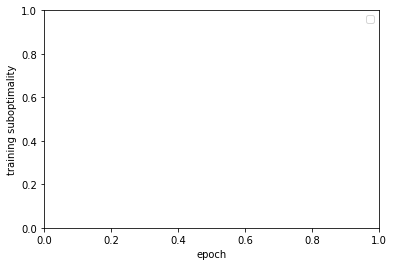

In [7]:
quantizations = [ "random-400-2bit","random-400-4bit","random-400-8bit"]
topologies = ['ring', 'star', 'random']
num_nodes = [9, 25, 64]
quantization = ''
shift = 0
method = "dcd"
label =  'decentralized' + ""
display_name = []
color = "C0"
marker = 'o'
markevery = 10

for split_way in ['label-sorted']:
    
    for num_node in num_nodes:
        
        for topology in topologies:
            
            for quantization in quantizations:

                display_name = 'Topology ' + topology + ': '+ "Nodes - "+str(num_node) +": "+ quantization 

                plot_final(method, quantization, split_way, num_node, topology, label, display_name )

    name = "diff node "+method +" "+ str(num_node) + ' nodes ' + topology + " Topology " + quantization 
            
    plt.legend()
#     plt.ylim(40e-3,1e-0)
#     plt.xscale("log")
    plt.xlabel('epoch')
    plt.ylabel('')
    plt.ylabel("training suboptimality")
    print(name)
#     plt.savefig(name, dpi = 1000)
#     plt.savefig("Comparision of different num_nodes with "+topology+ " topology", dpi =1000)
    

In [8]:
# Decentralised Plain
l1 = [("decentralized", "", "random", 9, "star", 'decentralized' + "", "Topology: Star, Nodes: 9"),
     ("decentralized", "", "random", 25, "star", 'decentralized' + "", "Topology: Star, Nodes: 25"),
    ("decentralized", "", "random", 64, "star", 'decentralized' + "", "Topology: Star, Nodes: 64"),
    ("decentralized", "", "random", 9, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 9"),
    ("decentralized", "", "random", 25, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 25"),
     ("decentralized", "", "random", 64, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 64"),
    ("decentralized", "", "random", 9, "random", 'decentralized' + "", "Topology: Random, Nodes: 9"),
    ("decentralized", "", "random", 25, "random", 'decentralized' + "", "Topology: Random, Nodes: 25"),
    ("decentralized", "", "random", 64, "random", 'decentralized' + "", "Topology: Random, Nodes: 64")]

l2 = [("decentralized", "", "random", 9, "star", 'decentralized' + "", "Topology: Star, Nodes: 9"),
      ("decentralized", "", "random", 9, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 9"),
       ("decentralized", "", "random", 9, "random", 'decentralized' + "", "Topology: Random, Nodes: 9"),
     ("decentralized", "", "random", 25, "star", 'decentralized' + "", "Topology: Star, Nodes: 25"),
      ("decentralized", "", "random", 25, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 25"),
      ("decentralized", "", "random", 25, "random", 'decentralized' + "", "Topology: Random, Nodes: 25"),
    ("decentralized", "", "random", 64, "star", 'decentralized' + "", "Topology: Star, Nodes: 64"), 
     ("decentralized", "", "random", 64, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 64"),
    ("decentralized", "", "random", 64, "random", 'decentralized' + "", "Topology: Random, Nodes: 64")]


In [88]:
l7 = [("decentralized", "", "random", 9, "star", 'decentralized' + "", "Plain, Topology: Star, Nodes: 9 "),
    ("decentralized", "", "random", 25, "star", 'decentralized' + "", "Plain, Topology: Star, Nodes: 25"),
    ("decentralized", "", "random", 64, "star", 'decentralized' + "", "Plain, Topology: Star, Nodes: 64 "),

    ("dcd", "qsgd-4bit", "random", 9, "ring", 'decentralized' + "", "DCD,Topology: Star, Nodes: 9 QSGD: 4 bit"),
    ("dcd", "qsgd-4bit", "random", 25, "ring", 'decentralized' + "", "DCD, Topology: Star, Nodes: 25 QSGD: 4 bit"),
    ("dcd", "qsgd-4bit", "random", 64, "ring", 'decentralized' + "", "DCD, Topology: Star, Nodes: 64 QSGD: 4 bit"),

    ("choco-random", "4bit", "random",9, "star", 'decentralized' + "", "Choco, Topology: Star, Nodes: 9 QSGD: 4 bit"),
    ("choco-random", "4bit", "random",25, "star", 'decentralized' + "", "Choco, Topology: Star, Nodes: 25 QSGD: 4 bit"),
    ("choco-random", "4bit", "random",64, "star", 'decentralized' + "", "Choco, Topology: Star, Nodes: 64 QSGD: 4 bit"),
]

In [100]:
l8 = [("decentralized", "", "random", 9, "star", 'decentralized' + "", "Plain, Topology: Star, Nodes: 9 "),
    ("decentralized", "", "random", 25, "star", 'decentralized' + "", "Plain, Topology: Star, Nodes: 25"),
    ("decentralized", "", "random", 64, "star", 'decentralized' + "", "Plain, Topology: Star, Nodes: 64 "),

    ("choco", "top-400-4bit", "random",9, "star", 'decentralized' + "", "Choco, Topology: Star, Nodes: 9 QSGD: 4 bit"),
    ("choco", "top-400-4bit", "random",25, "star", 'decentralized' + "", "Choco, Topology: Star, Nodes: 25 QSGD: 4 bit"),
    ("choco", "top-400-4bit", "random",64, "star", 'decentralized' + "", "Choco, Topology: Star, Nodes: 64 QSGD: 4 bit"),

    ("choco-random", "4bit", "random",9, "star", 'decentralized' + "", "Choco, Topology: Star, Nodes: 9 QSGD: 4 bit"),
    ("choco-random", "4bit", "random",25, "star", 'decentralized' + "", "Choco, Topology: Star, Nodes: 25 QSGD: 4 bit"),
    ("choco-random", "4bit", "random",64, "star", 'decentralized' + "", "Choco, Topology: Star, Nodes: 64 QSGD: 4 bit"),
]

In [147]:
l15 = [
    ("new1-qsgd", "5-bit", "random", 100, "star prob = 1", 'new-qsgd' + "", "Probabilty = 1, nodes 100, ring"),
    ("new1-qsgd", "5-bit", "random", 100, "star prob = 0.5", 'new-qsgd' + "", "Probabilty = 0.5, nodes 100, ring"),
    ("new1-qsgd", "5-bit", "random", 100, "star prob = 0.25", 'new-qsgd' + "", "Probabilty = 0.25, nodes 100, ring"),
    ("new1-qsgd", "5-bit", "random", 100, "star prob = 0", 'new-qsgd' + "", "Probabilty = 0, nodes 100, ring"),

    
]

Probabilty = 1, nodes 100, ring
Probabilty = 0.5, nodes 100, ring
Probabilty = 0.25, nodes 100, ring
Probabilty = 0, nodes 100, ring


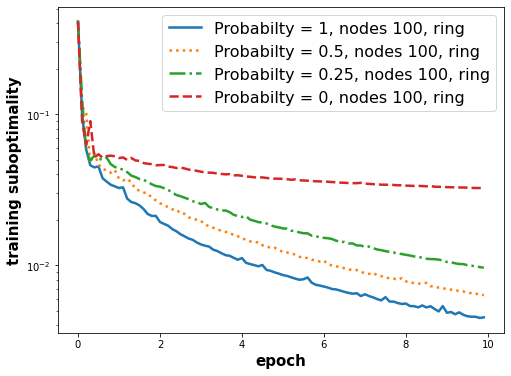

In [163]:
fig, ax = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(8)
i=0
l = [ '-', ':', '-.','--']
for method, quantization, split_way, num_node, topology, label, display_name in l15:
    print(display_name)
    x, y = plot_final(method, quantization, split_way, num_node, topology, label, display_name )
    ax.plot(x, y, label = display_name,linewidth = 2.5, ls = l[i%4])
    i+=1
ax.legend(fontsize = '16')
# ax.title("Loss vs Epochs (Num_nodes = 64, Topology = Star)")
ax.set_yscale("log")
ax.set_xlabel('epoch',size = 15,fontweight='bold')
# plt.ylabel('')
ax.set_ylabel("training suboptimality", size = 15,fontweight='bold')
plt.savefig("New method 100 nodes, star, 5 bits.png", dpi = 1000)

1
2
3
4
5
6
7
8
9


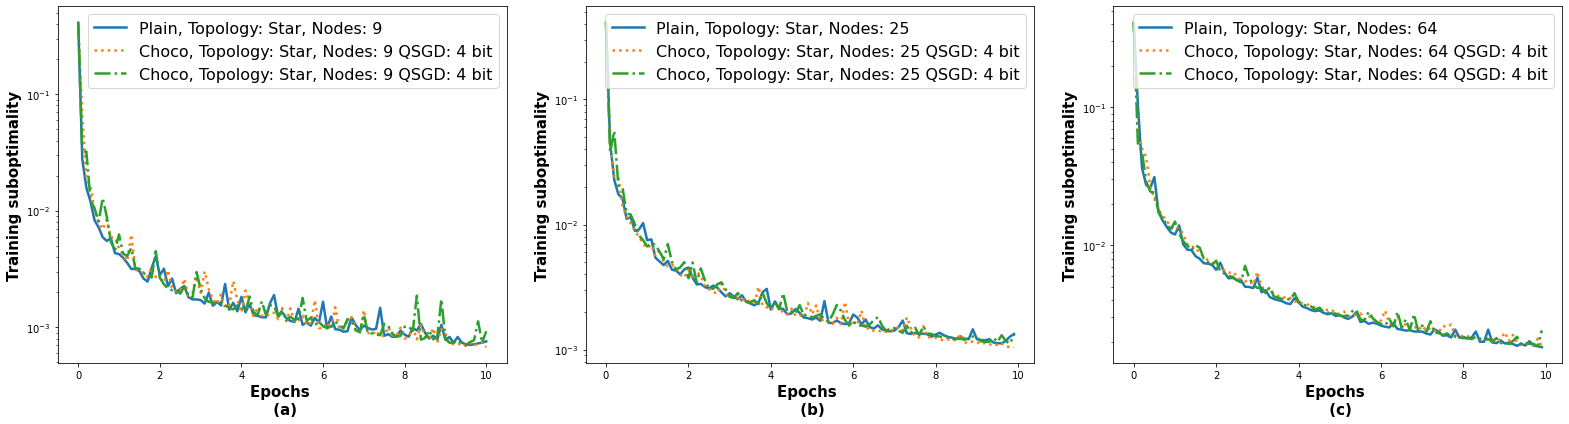

In [130]:
x_arrays = []
y_arrays = []
i = 0

fig, ax = plt.subplots(1,3)
fig.set_figheight(6)
fig.set_figwidth(22)
l = [ '-', ':', '-.']
for method, quantization, split_way, num_node, topology, label, display_name in l8:
    
    
    x, y = plot_final(method, quantization, split_way, num_node, topology, label, display_name )
    x_arrays.append(x)
    y_arrays.append(y)
    ax[i%3].plot(x,y, label = display_name,ls =l[i//3], linewidth = 2.5)
#     print(display_name)
    
    
    i+=1
    print(i)
down = np.array(['(a)','(b)','(c)'])
for j in range(3):
        ax[j].legend(loc='upper right', fontsize = '16')
        ax[j].set_yscale('log')
        ax[j].set_xlabel(f'Epochs \n {down[j]}',size = 15,fontweight='bold')
        ax[j].set_ylabel("Training suboptimality",size = 15,fontweight='bold')
plt.tight_layout()
#          plot_final(method, quantization, split_way, num_node, topology, label, display_name )
# plt.legend()
# plt.title("Loss vs Epochs (Num_nodes = 64, Topology = Star)")
plt.yscale("log")

plt.savefig("comparison_plain vs choco 4bit vc choco top 400 4 bits.png", dpi = 300)

In [32]:
# DCD 4 bit

l4 = [("dcd", "qsgd-4bit", "random", 9, "star", 'decentralized' + "", "Topology: Star, Nodes: 9, QSGD: 4 bit"),
     ("dcd", "qsgd-4bit", "random", 25, "star", 'decentralized' + "", "Topology: Star, Nodes: 25 QSGD: 4 bit"),
    ("dcd", "qsgd-4bit", "random", 64, "star", 'decentralized' + "", "Topology: Star, Nodes: 64 QSGD: 4 bit"),
    ("dcd", "qsgd-4bit", "random", 9, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 9 QSGD: 4 bit"),
    ("dcd", "qsgd-4bit", "random", 25, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 25 QSGD: 4 bit"),
     ("dcd", "qsgd-4bit", "random", 64, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 64 QSGD: 4 bit"),
    ("dcd", "qsgd-4bit", "random", 9, "random", 'decentralized' + "", "Topology: Random, Nodes: 9 QSGD: 4 bit"),
    ("dcd", "qsgd-4bit", "random", 25, "random", 'decentralized' + "", "Topology: Random, Nodes: 25 QSGD: 4 bit"),
    ("dcd", "qsgd-4bit", "random", 64, "random", 'decentralized' + "", "Topology: Random, Nodes: 64 QSGD: 4 bit"),
     ("dcd", "qsgd-8bit", "random", 9, "star", 'decentralized' + "", "Topology: Star, Nodes: 9, QSGD: 8 bit"),
     ("dcd", "qsgd-8bit", "random", 25, "star", 'decentralized' + "", "Topology: Star, Nodes: 25 QSGD: 8 bit"),
    ("dcd", "qsgd-8bit", "random", 64, "star", 'decentralized' + "", "Topology: Star, Nodes: 64 QSGD: 8 bit"),
    ("dcd", "qsgd-8bit", "random", 9, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 9 QSGD: 8 bit"),
    ("dcd", "qsgd-8bit", "random", 25, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 25 QSGD: 8 bit"),
     ("dcd", "qsgd-8bit", "random", 64, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 64 QSGD: 8 bit"),
    ("dcd", "qsgd-8bit", "random", 9, "random", 'decentralized' + "", "Topology: Random, Nodes: 9 QSGD: 8 bit"),
    ("dcd", "qsgd-8bit", "random", 25, "random", 'decentralized' + "", "Topology: Random, Nodes: 25 QSGD: 8 bit"),
    ("dcd", "qsgd-8bit", "random", 64, "random", 'decentralized' + "", "Topology: Random, Nodes: 64 QSGD: 8 bit")]

In [78]:
# CHOCO

l5 = [
#     ("choco-random", "2bit", "random", 9, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 9 QSGD: 2 bit"),
#     ("choco-random", "2bit", "random", 25, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 25 QSGD: 2 bit"),
#      ("choco-random", "2bit", "random", 64, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 64 QSGD: 2 bit"),
    
    ("choco-random", "2bit", "random", 9, "star", 'decentralized' + "", "Topology: Star, Nodes: 9, CHOCO: 2 bit"),
    ("choco-random", "4bit", "random", 9, "star", 'decentralized' + "", "Topology: Star, Nodes: 9, CHOCO: 4 bit"),
        ("choco-random", "8bit", "random", 9, "star", 'decentralized' + "", "Topology: Star, Nodes: 9, CHOCO: 8 bit"),
     ("choco-random", "2bit", "random", 25, "star", 'decentralized' + "", "Topology: Star, Nodes: 25 QSGD: 2 bit"),
    ("choco-random", "4bit", "random", 25, "star", 'decentralized' + "", "Topology: Star, Nodes: 25 QSGD: 4 bit"),
        ("choco-random", "8bit", "random", 25, "star", 'decentralized' + "", "Topology: Star, Nodes: 25 QSGD: 8 bit"),
    ("choco-random", "2bit", "random", 64, "star", 'decentralized' + "", "Topology: Star, Nodes: 64 QSGD: 2 bit"),
     
    ("choco-random", "4bit", "random", 64, "star", 'decentralized' + "", "Topology: Star, Nodes: 64 QSGD: 4 bit"),
    ("choco-random", "8bit", "random", 64, "star", 'decentralized' + "", "Topology: Star, Nodes: 64 QSGD: 8 bit"),
    
        ("choco-random", "2bit", "random", 9, "random", 'decentralized' + "", "Topology: Random, Nodes: 9 QSGD: 2 bit"),
    ("choco-random", "4bit", "random", 9, "random", 'decentralized' + "", "Topology: Random, Nodes: 9 QSGD: 4 bit"),
     ("choco-random", "8bit", "random", 9, "random", 'decentralized' + "", "Topology: Random, Nodes: 9 QSGD: 8 bit"),
    
    ("choco-random", "2bit", "random", 25, "random", 'decentralized' + "", "Topology: Random, Nodes: 25 QSGD: 2 bit"),
    ("choco-random", "4bit", "random", 25, "random", 'decentralized' + "", "Topology: Random, Nodes: 25 QSGD: 4 bit"),
    ("choco-random", "8bit", "random", 25, "random", 'decentralized' + "", "Topology: Random, Nodes: 25 QSGD: 8 bit"),
    
    
    ("choco-random", "2bit", "random", 64, "random", 'decentralized' + "", "Topology: Random, Nodes: 64 QSGD: 2 bit"),
    
        
    
    ("choco-random", "4bit", "random", 64, "random", 'decentralized' + "", "Topology: Random, Nodes: 64 QSGD: 4 bit"),
    

    
#     ("choco-random", "4bit", "random", 9, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 9 QSGD: 4 bit"),
#     ("choco-random", "4bit", "random", 25, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 25 QSGD: 4 bit"),
#      ("choco-random", "4bit", "random", 64, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 64 QSGD: 4 bit"),
    

      
     
#     ("choco-random", "8bit", "random", 9, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 9 QSGD: 8 bit"),
#     ("choco-random", "8bit", "random", 25, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 25 QSGD: 8 bit"),
#      ("choco-random", "8bit", "random", 64, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 64 QSGD: 8 bit"),
 
    
   
    
    ("choco-random", "8bit", "random", 64, "random", 'decentralized' + "", "Topology: Random, Nodes: 64 QSGD: 8 bit")]



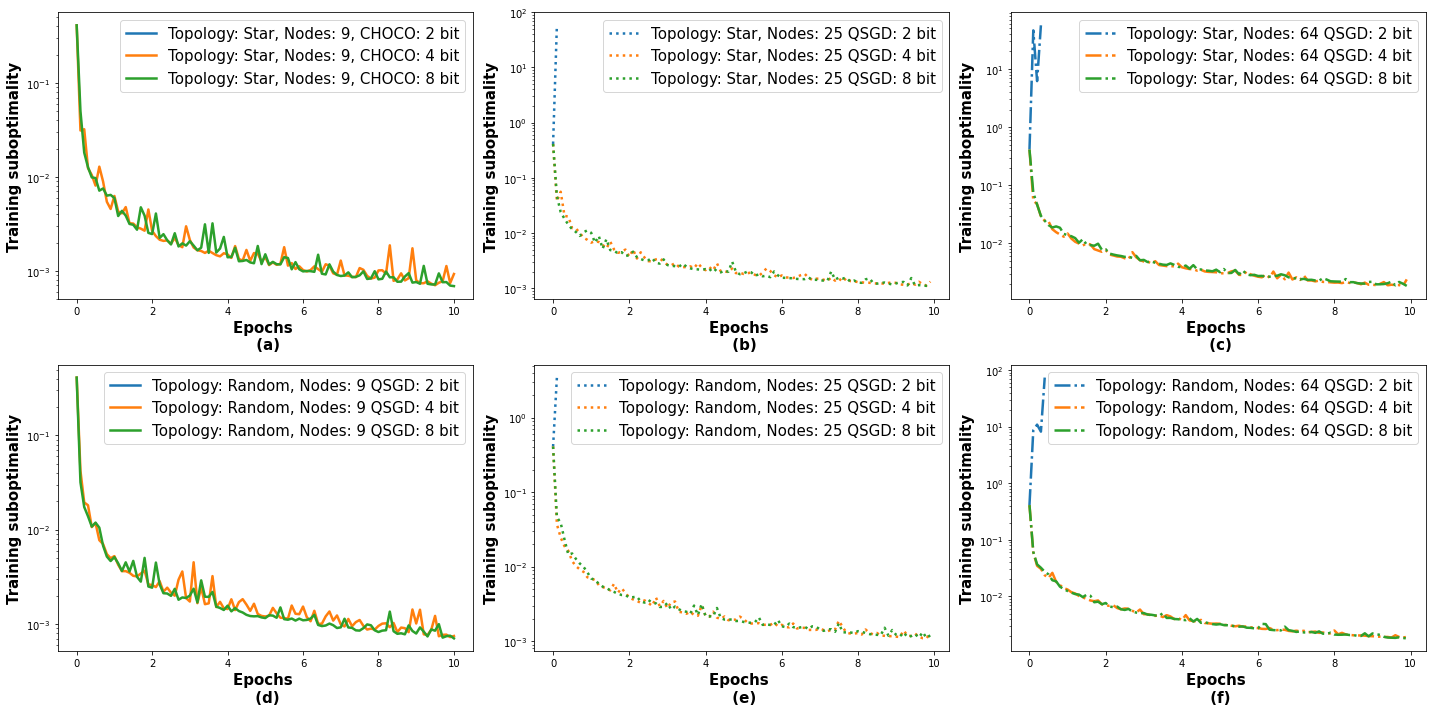

In [82]:
x_arrays = []
y_arrays = []
i = 0
l = [ '-', ':', '-.']
fig, ax = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(20)

for method, quantization, split_way, num_node, topology, label, display_name in l5:
    
    
    x, y = plot_final(method, quantization, split_way, num_node, topology, label, display_name )
    x_arrays.append(x)
    y_arrays.append(y)
    ax[(i//9)][i//3%3].plot(x,y, label = display_name,ls =l[(i//3)%3], linewidth = 2.5)
#     print(display_name)
    
    
    i+=1
#     print(i)
down = np.array([['(a)','(b)','(c)'], ['(d)','(e)','(f)']])
for i in range(2):
    for j in range(3):
        ax[i,j].legend(loc='upper right', fontsize = '15')
        ax[i,j].set_yscale('log')
        ax[i,j].set_xlabel(f'Epochs \n {down[i,j]}',size = 15,fontweight='bold')
        ax[i,j].set_ylabel("Training suboptimality",size = 15,fontweight='bold')
plt.tight_layout()
#          plot_final(method, quantization, split_way, num_node, topology, label, display_name )
# plt.legend()
# plt.title("Loss vs Epochs (Num_nodes = 64, Topology = Star)")
plt.yscale("log")

plt.savefig("Choco_Different bits compariosn.png", dpi = 300)

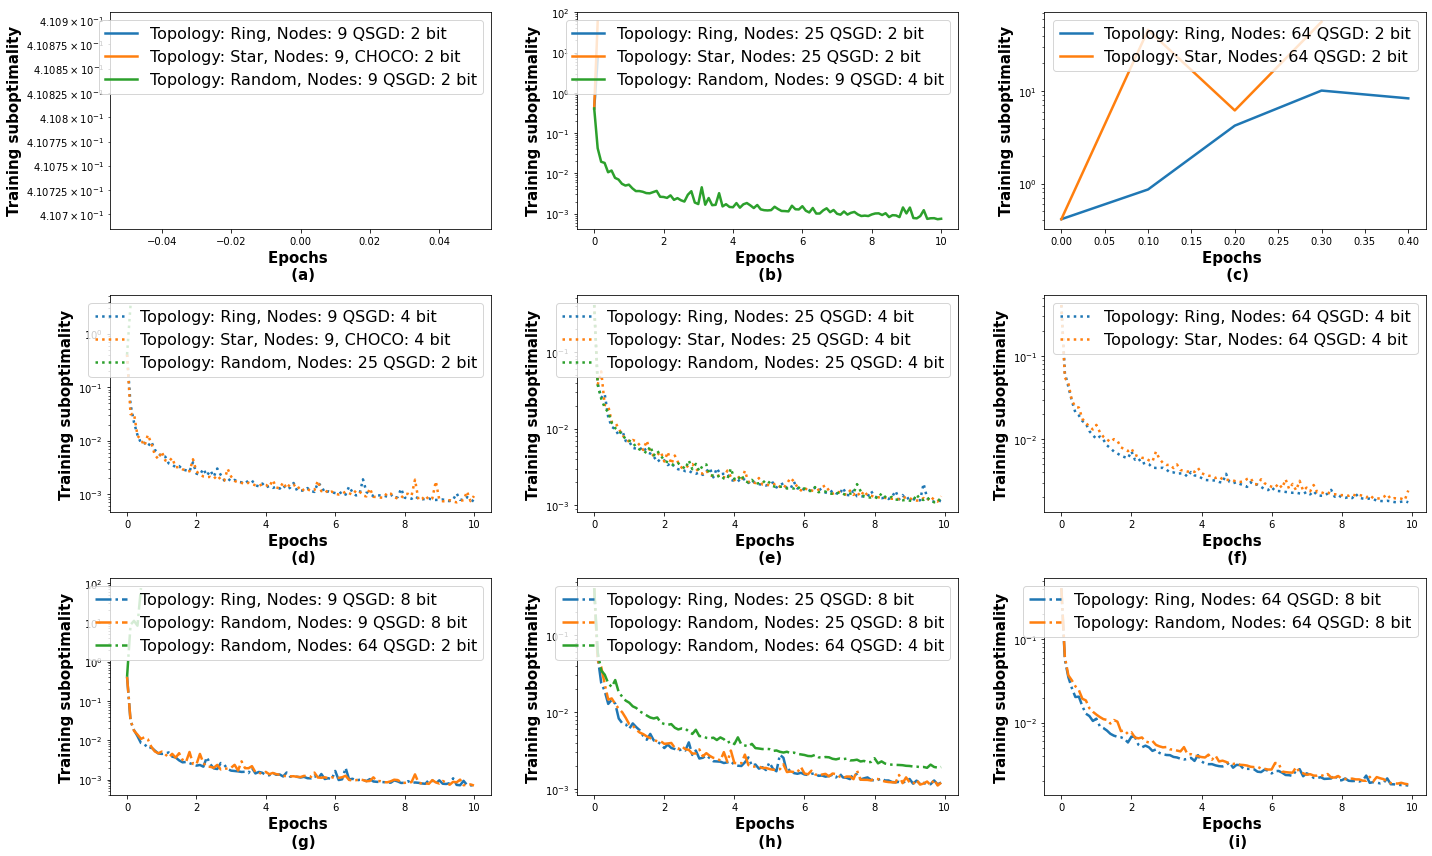

In [76]:
x_arrays = []
y_arrays = []
i = 0

fig, ax = plt.subplots(3,3)
fig.set_figheight(12)
fig.set_figwidth(20)

for method, quantization, split_way, num_node, topology, label, display_name in l5:
    
    
    x, y = plot_final(method, quantization, split_way, num_node, topology, label, display_name )
    x_arrays.append(x)
    y_arrays.append(y)
    ax[i%3][((i//3))%3].plot(x,y, label = display_name,ls =l[(i%3)], linewidth = 2.5)
#     print(display_name)
    
    
    i+=1
#     print(i)
down = np.array([['(a)','(b)','(c)'], ['(d)','(e)','(f)'],['(g)','(h)','(i)']])
for i in range(3):
    for j in range(3):
        ax[i,j].legend(loc='upper right', fontsize = '16')
        ax[i,j].set_yscale('log')
        ax[i,j].set_xlabel(f'Epochs \n {down[i,j]}',size = 15,fontweight='bold')
        ax[i,j].set_ylabel("Training suboptimality",size = 15,fontweight='bold')
plt.tight_layout()
#          plot_final(method, quantization, split_way, num_node, topology, label, display_name )
# plt.legend()
# plt.title("Loss vs Epochs (Num_nodes = 64, Topology = Star)")
plt.yscale("log")

# plt.savefig("DCD_Different bit comparison.png", dpi = 300)

In [73]:
# CHOCO

l5 = [
("choco-random", "2bit", "random", 9, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 9 QSGD: 2 bit"),
("choco-random", "4bit", "random", 9, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 9 QSGD: 4 bit"),
("choco-random", "8bit", "random", 9, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 9 QSGD: 8 bit"),


("choco-random", "2bit", "random", 25, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 25 QSGD: 2 bit"),
("choco-random", "4bit", "random", 25, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 25 QSGD: 4 bit"),
("choco-random", "8bit", "random", 25, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 25 QSGD: 8 bit"),


("choco-random", "2bit", "random", 64, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 64 QSGD: 2 bit"),
("choco-random", "4bit", "random", 64, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 64 QSGD: 4 bit"),
("choco-random", "8bit", "random", 64, "ring", 'decentralized' + "", "Topology: Ring, Nodes: 64 QSGD: 8 bit"),



("choco-random", "2bit", "random", 9, "star", 'decentralized' + "", "Topology: Star, Nodes: 9, CHOCO: 2 bit"),
("choco-random", "4bit", "random", 9, "star", 'decentralized' + "", "Topology: Star, Nodes: 9, CHOCO: 4 bit"),
("choco-random", "8bit", "random", 9, "random", 'decentralized' + "", "Topology: Random, Nodes: 9 QSGD: 8 bit"),

("choco-random", "2bit", "random", 25, "star", 'decentralized' + "", "Topology: Star, Nodes: 25 QSGD: 2 bit"),
("choco-random", "4bit", "random", 25, "star", 'decentralized' + "", "Topology: Star, Nodes: 25 QSGD: 4 bit"),
("choco-random", "8bit", "random", 25, "random", 'decentralized' + "", "Topology: Random, Nodes: 25 QSGD: 8 bit"),


("choco-random", "2bit", "random", 64, "star", 'decentralized' + "", "Topology: Star, Nodes: 64 QSGD: 2 bit"),
("choco-random", "4bit", "random", 64, "star", 'decentralized' + "", "Topology: Star, Nodes: 64 QSGD: 4 bit"),
("choco-random", "8bit", "random", 64, "random", 'decentralized' + "", "Topology: Random, Nodes: 64 QSGD: 8 bit"),



("choco-random", "2bit", "random", 9, "random", 'decentralized' + "", "Topology: Random, Nodes: 9 QSGD: 2 bit"),
("choco-random", "2bit", "random", 25, "random", 'decentralized' + "", "Topology: Random, Nodes: 25 QSGD: 2 bit"),
("choco-random", "2bit", "random", 64, "random", 'decentralized' + "", "Topology: Random, Nodes: 64 QSGD: 2 bit"),




("choco-random", "4bit", "random", 9, "random", 'decentralized' + "", "Topology: Random, Nodes: 9 QSGD: 4 bit"),
("choco-random", "4bit", "random", 25, "random", 'decentralized' + "", "Topology: Random, Nodes: 25 QSGD: 4 bit"),
("choco-random", "4bit", "random", 64, "random", 'decentralized' + "", "Topology: Random, Nodes: 64 QSGD: 4 bit"),
]

     
    

